# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


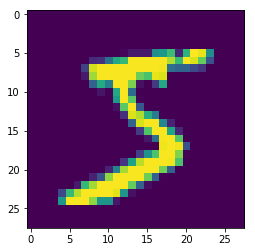

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(8,3,3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16,3,3,activation='relu'))
# model.add(Convolution2D(32, 3, 3, activation='relu')) 

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(10, 1, activation='relu'))

model.add(Convolution2D(10,12))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  """


In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 12, 12, 10)        170       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 1, 1, 10)          14410     
_________________________________________________________________
flatten_3 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total para

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [21]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=15, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0807 17:16:28.537314 139966756648832 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0807 17:16:28.603091 139966756648832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/15
60000/60000 [==============================] - 14s 241us/step - loss: 0.2171 - acc: 0.9359
Epoch 2/15
60000/60000 [==============================] - 8s 138us/step - loss: 0.0830 - acc: 0.9754
Epoch 3/15
60000/60000 [==============================] - 8s 138us/step - loss: 0.0608 - acc: 0.9814
Epoch 4/15
60000/60000 [==============================] - 8s 138us/step - loss: 0.0491 - acc: 0.9848
Epoch 5/15
60000/60000 [==============================] - 8s 140us/step - loss: 0.0408 - acc: 0.9873
Epoch 6/15
60000/60000 [==============================] - 8s 138us/step - loss: 0.0353 - acc: 0.9888
Epoch 7/15
60000/60000 [==============================] - 9s 146us/step - loss: 0.0306 - acc: 0.9903
Epoch 8/15
60000/60000 [==============================] - 8s 140us/step - loss: 0.0258 - acc: 0.9916
Epoch 9/15
60000/60000 [==============================] - 8s 138us/step - loss: 0.0235 - acc: 0.9926
Epoch 10/15
60000/60000 [==============================] - 8s 138us/step - loss: 0.0195 - 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [23]:
print(score)

[0.05971291664711134, 0.9858]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[3.31135553e-12 2.10549425e-10 5.92420557e-10 1.61596454e-05
  2.81717115e-11 1.59540052e-13 3.71585165e-18 9.99983668e-01
  3.74534848e-09 1.37966310e-07]
 [4.38656711e-09 1.14469194e-05 9.99986291e-01 4.48565823e-10
  5.46340967e-13 3.18402527e-10 2.21667528e-06 6.53469309e-17
  2.62090183e-10 4.24874410e-13]
 [1.91739741e-06 9.99835372e-01 1.14180357e-05 2.10677385e-07
  7.93066283e-05 3.41810065e-08 1.35348409e-06 5.29556091e-05
  1.72187192e-05 2.20972751e-07]
 [9.99987125e-01 1.82519985e-10 6.89067747e-06 1.53753610e-09
  4.70030859e-09 4.60683189e-08 5.92369543e-06 2.09539976e-08
  1.14440626e-08 1.26972486e-08]
 [6.33969464e-08 2.30184263e-08 7.55896901e-10 1.59816560e-09
  9.99996662e-01 7.91575636e-16 9.77188330e-11 3.11540873e-08
  7.22485893e-08 3.17455920e-06]
 [3.20737485e-07 9.98983443e-01 2.86813952e-06 2.84726074e-08
  2.40037625e-05 1.75673709e-09 2.35819400e-08 9.60790378e-04
  2.80515214e-05 3.55783897e-07]
 [8.67670519e-13 1.09862924e-07 1.05039740e-04 1.86381097e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [25]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored